In [1]:
#Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Lê o csv
df = pd.read_csv('data/all.csv')

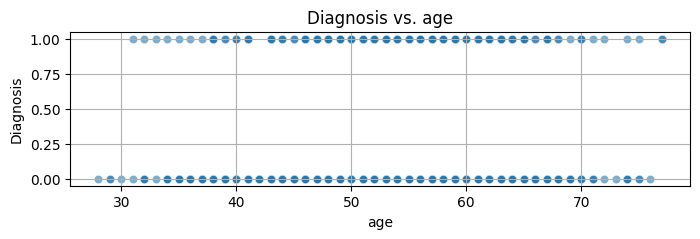

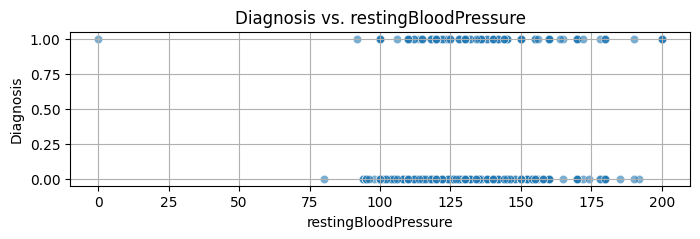

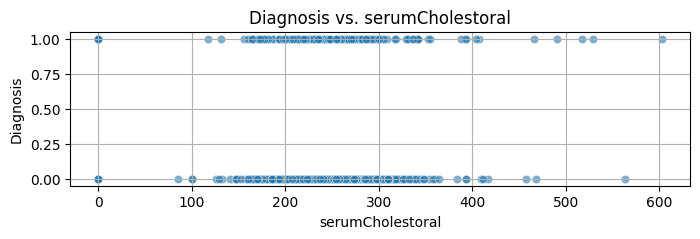

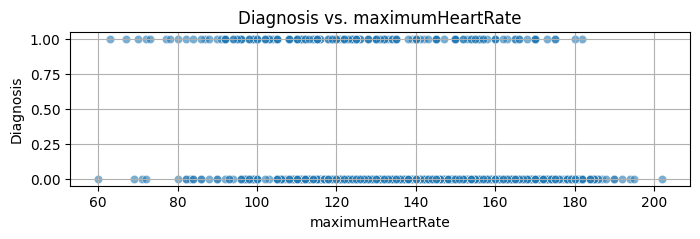

In [3]:
# Cria plots the ponto para inputs continuos
continuous_features = ["age", "restingBloodPressure", "serumCholestoral", "maximumHeartRate"]
for featureA in continuous_features:
    plt.figure(figsize=(8, 2))
    sns.scatterplot(x=df[featureA], y=df["diagnosis"], alpha=0.6)
    plt.xlabel(featureA)
    plt.ylabel("Diagnosis")
    plt.title(f"Diagnosis vs. {featureA}")
    plt.grid(True)
    plt.show()

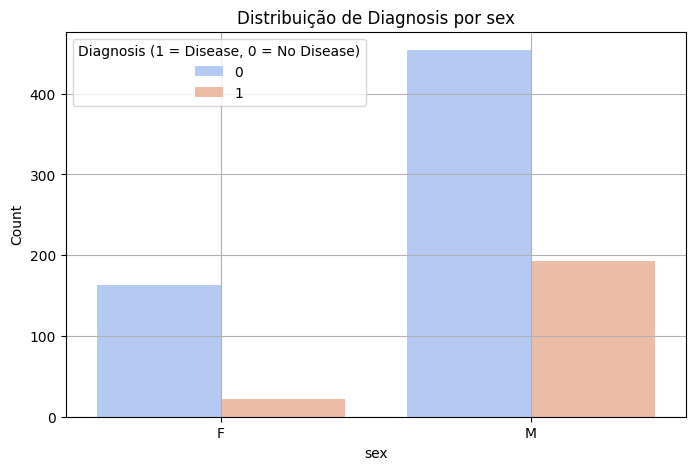

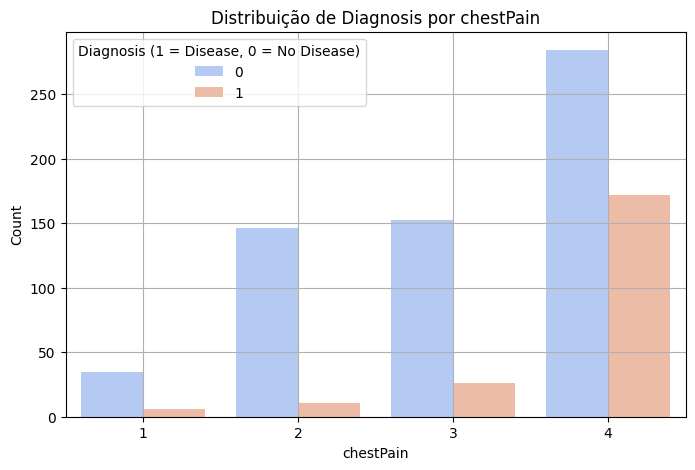

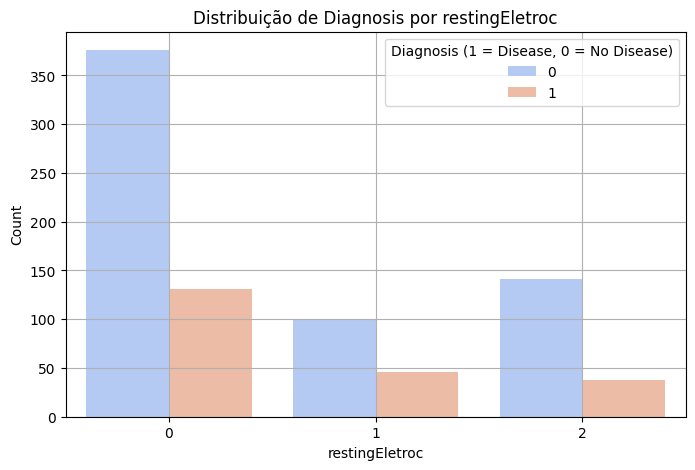

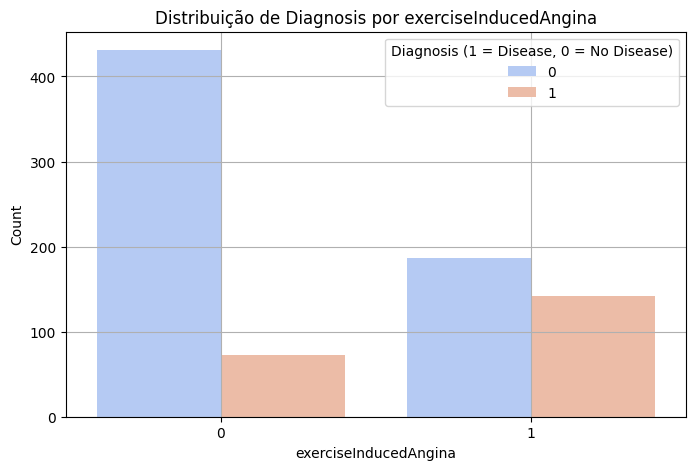

In [4]:
# Cria plots the barra para inputs categoricos
categorical_features = ["sex", "chestPain", "restingEletroc", "exerciseInducedAngina"]
sex_labels = {1: "M", 0: "F"}
for featureB in categorical_features:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x=df[featureB], hue=df["diagnosis"], palette="coolwarm")
    if featureB == "sex":
        ax.set_xticks([0, 1])
        ax.set_xticklabels(["F", "M"])
    plt.xlabel(featureB)
    plt.ylabel("Count")
    plt.title(f"Distribuição de Diagnosis por {featureB}")
    plt.legend(title="Diagnosis (1 = Disease, 0 = No Disease)")
    plt.grid(True)
    plt.show()

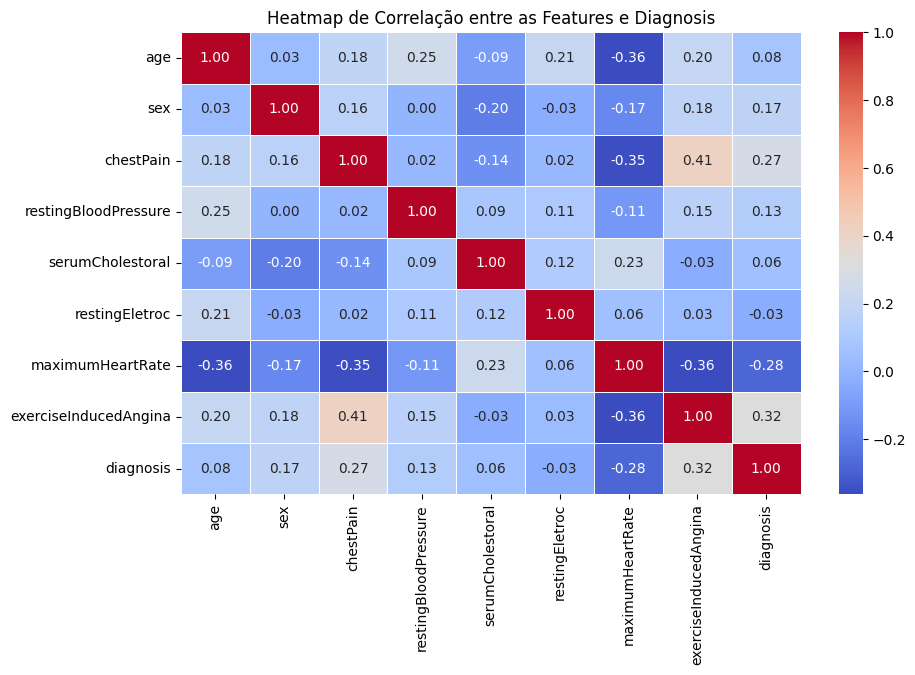

In [5]:
# Fazendo o heatMap das features (O quanto que uma feuture está presente faz com que a outra esteja maior ou menor)
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlação entre as Features e Diagnosis")
plt.show()

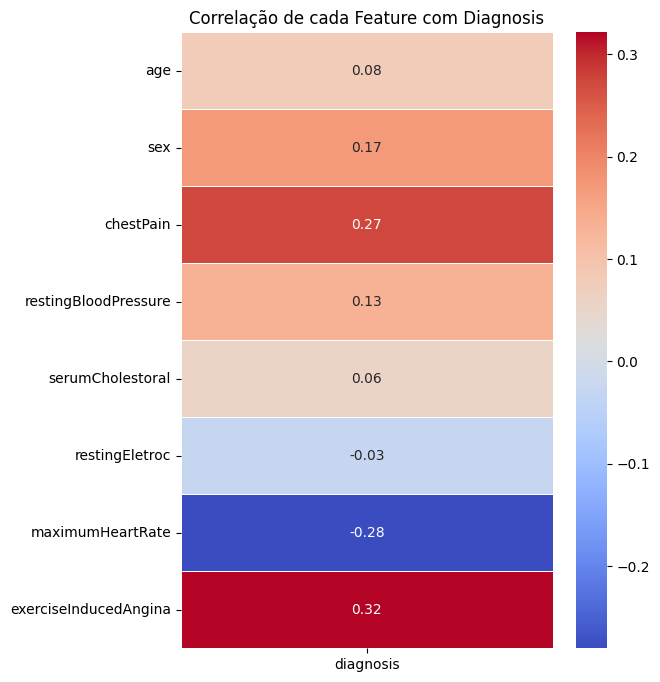

In [8]:
# Fazendo o heatMap apenas com a relação de cada parâmetro com "diagnosis"
corr_with_diagnosis = corr_matrix[["diagnosis"]].drop(index="diagnosis")
plt.figure(figsize=(6, 8))
sns.heatmap(corr_with_diagnosis, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlação de cada Feature com Diagnosis")
plt.show()

In [7]:
# Computando as medidas de disperção para cada input
features = df.columns.tolist()
features.remove("diagnosis")
dispersion_measures = {}
for feature in features:
    data = df[feature]
    dispersion_measures[feature] = {
        "Mínimo": data.min(),
        "Máximo": data.max(),
        "Amplitude": data.max() - data.min(),
        "Média": data.mean(),
        "Mediana": data.median(),
        "Variância": data.var(),
        "Desvio Padrão": data.std(),
        "Coeficiente de Variação (CV)": (data.std() / data.mean()) if data.mean() != 0 else None,
        "Primeiro Quartil (Q1)": data.quantile(0.25),
        "Terceiro Quartil (Q3)": data.quantile(0.75),
        "IQR (Q3 - Q1)": data.quantile(0.75) - data.quantile(0.25)
    }
dispersion_df = pd.DataFrame(dispersion_measures).T
dispersion_df

,Mínimo,Máximo,Amplitude,Média,Mediana,Variância,Desvio Padrão,Coeficiente de Variação (CV),Primeiro Quartil (Q1),Terceiro Quartil (Q3),IQR (Q3 - Q1)
age,28.0,77.0,49.0,53.230769,54.0,87.125984,9.334130,0.175352,46.75,60.00,13.25
sex,0.0,1.0,1.0,0.777644,1.0,0.173122,0.416079,0.535051,1.00,1.00,0.00
chestPain,1.0,4.0,3.0,3.260817,4.0,0.866911,0.931080,0.285536,3.00,4.00,1.00
restingBloodPressure,0.0,200.0,200.0,132.100962,130.0,364.384500,19.088858,0.144502,120.00,140.00,20.00
serumCholestoral,0.0,603.0,603.0,200.159856,224.0,12186.637472,110.393104,0.551525,177.00,268.00,91.00
restingEletroc,0.0,2.0,2.0,0.605769,0.0,0.669907,0.818478,1.351139,0.00,1.00,1.00
maximumHeartRate,60.0,202.0,142.0,137.625000,140.0,676.261131,26.005021,0.188956,120.00,157.25,37.25
exerciseInducedAngina,0.0,1.0,1.0,0.394231,0.0,0.239100,0.488979,1.240336,0.00,1.00,1.00
